# **Analisis Perbandingan Model Logistic Regression, Random Forest, Decision Tree untuk Klasifikasi Penyakit Alzheimer**

In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV,cross_validate
from sklearn.metrics import roc_curve
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
data = pd.read_csv("C://Users//Asus//OneDrive//Documents//UPN//Perkuliahan//Semester 3//Analisis Data Eksploratif//Tugas Kelompok//Final Project//alzheimers_disease.csv")
data.head()

,Age,BMI,PhysicalActivity,SleepQuality,CholesterolTotal,MMSE,FunctionalAssessment,ADL,Diagnosis
0,73,22.927749,6.327112,9.025679,242.366840,21.463532,6.518877,1.725883,0
1,89,26.827681,7.619885,7.151293,231.162595,20.613267,7.118696,2.592424,0
2,73,17.795882,7.844988,9.673574,284.181858,7.356249,5.895077,7.119548,0
3,74,33.800817,8.428001,8.392554,159.582240,13.991127,8.965106,6.481226,0
4,89,20.716974,6.310461,5.597238,237.602184,13.517609,6.045039,0.014691,0


## Preprocessing Data

In [4]:
data.describe()

,Age,BMI,PhysicalActivity,SleepQuality,CholesterolTotal,MMSE,FunctionalAssessment,ADL,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,27.655697,4.920202,7.051081,225.197519,14.755132,5.080055,4.982958,0.353653
std,8.990221,7.217438,2.857191,1.763573,42.542233,8.613151,2.892743,2.949775,0.478214
min,60.000000,15.008851,0.003616,4.002629,150.093316,0.005312,0.000460,0.001288,0.000000
25%,67.000000,21.611408,2.570626,5.482997,190.252963,7.167602,2.566281,2.342836,0.000000
50%,75.000000,27.823924,4.766424,7.115646,225.086430,14.441660,5.094439,5.038973,0.000000
75%,83.000000,33.869778,7.427899,8.562521,262.031657,22.161028,7.546981,7.581490,1.000000
max,90.000000,39.992767,9.987429,9.999840,299.993353,29.991381,9.996467,9.999747,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   2149 non-null   int64  
 1   BMI                   2149 non-null   float64
 2   PhysicalActivity      2149 non-null   float64
 3   SleepQuality          2149 non-null   float64
 4   CholesterolTotal      2149 non-null   float64
 5   MMSE                  2149 non-null   float64
 6   FunctionalAssessment  2149 non-null   float64
 7   ADL                   2149 non-null   float64
 8   Diagnosis             2149 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 151.2 KB


In [6]:
data.isna().sum()

Age                     0
BMI                     0
PhysicalActivity        0
SleepQuality            0
CholesterolTotal        0
MMSE                    0
FunctionalAssessment    0
ADL                     0
Diagnosis               0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
print("\nStatistika Deskriptif:")
print(data.describe())


Statistika Deskriptif:
               Age          BMI  PhysicalActivity  SleepQuality  \
count  2149.000000  2149.000000       2149.000000   2149.000000   
mean     74.908795    27.655697          4.920202      7.051081   
std       8.990221     7.217438          2.857191      1.763573   
min      60.000000    15.008851          0.003616      4.002629   
25%      67.000000    21.611408          2.570626      5.482997   
50%      75.000000    27.823924          4.766424      7.115646   
75%      83.000000    33.869778          7.427899      8.562521   
max      90.000000    39.992767          9.987429      9.999840   

       CholesterolTotal         MMSE  FunctionalAssessment          ADL  \
count       2149.000000  2149.000000           2149.000000  2149.000000   
mean         225.197519    14.755132              5.080055     4.982958   
std           42.542233     8.613151              2.892743     2.949775   
min          150.093316     0.005312              0.000460     0.001288 

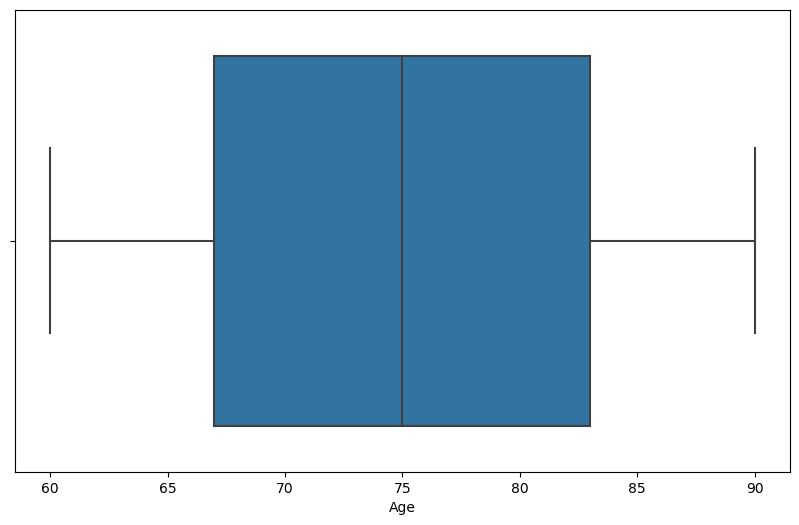

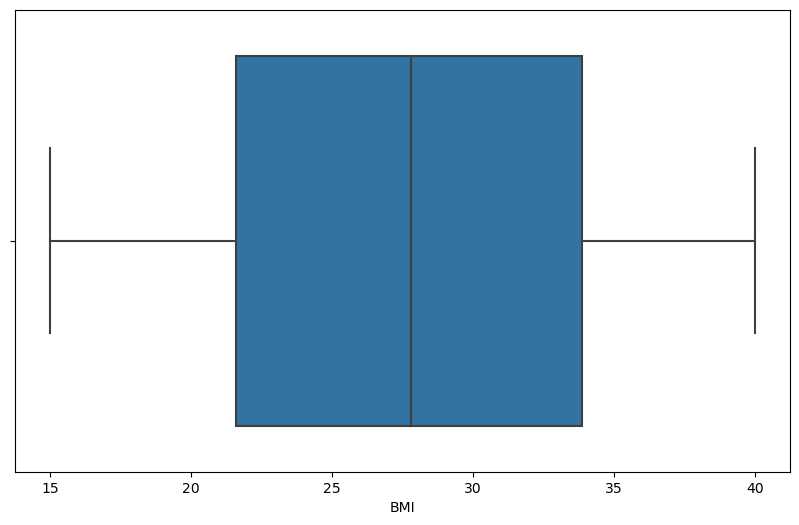

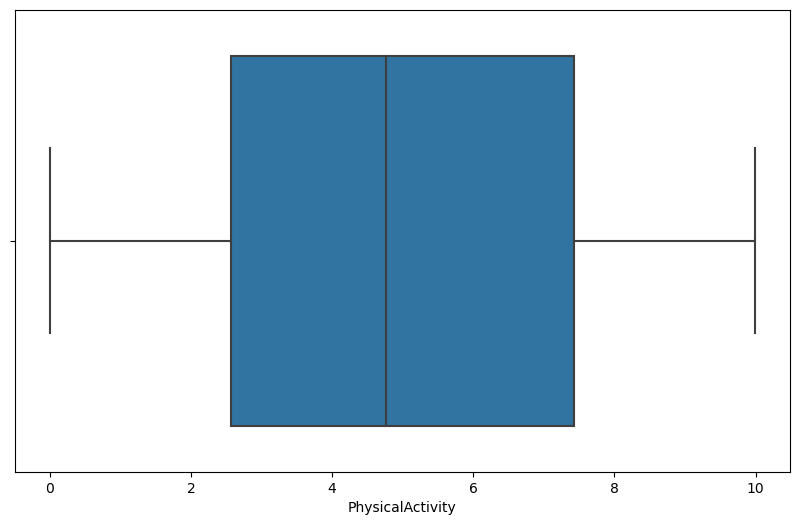

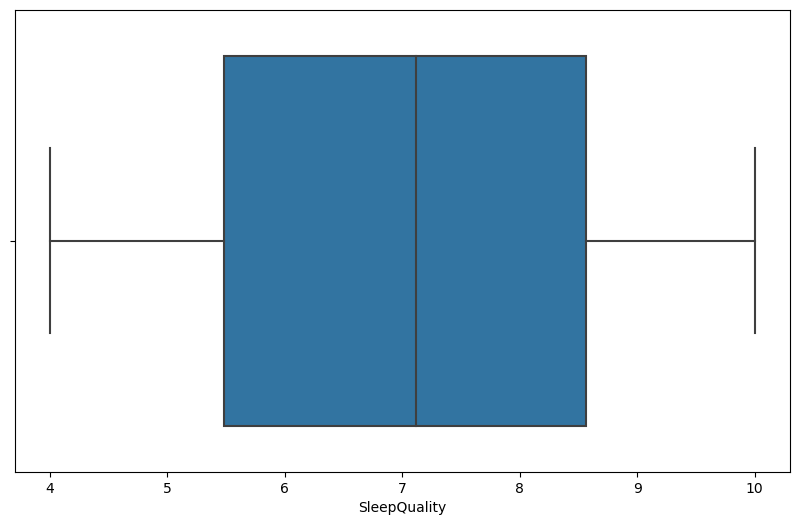

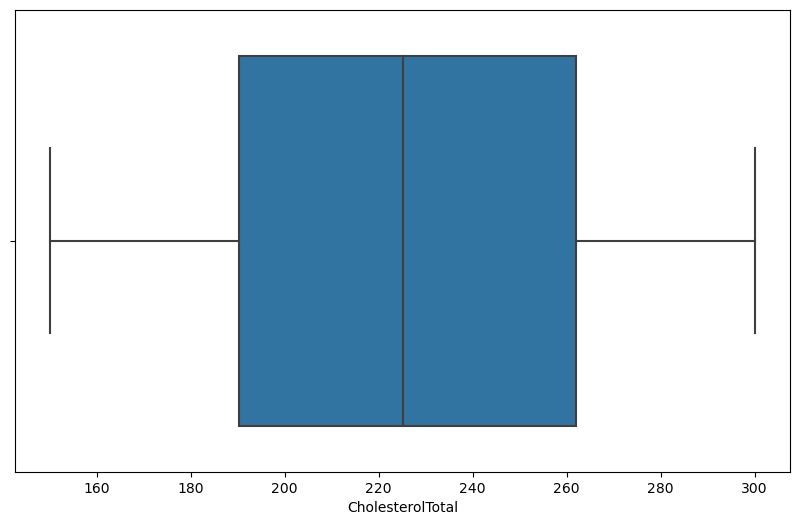

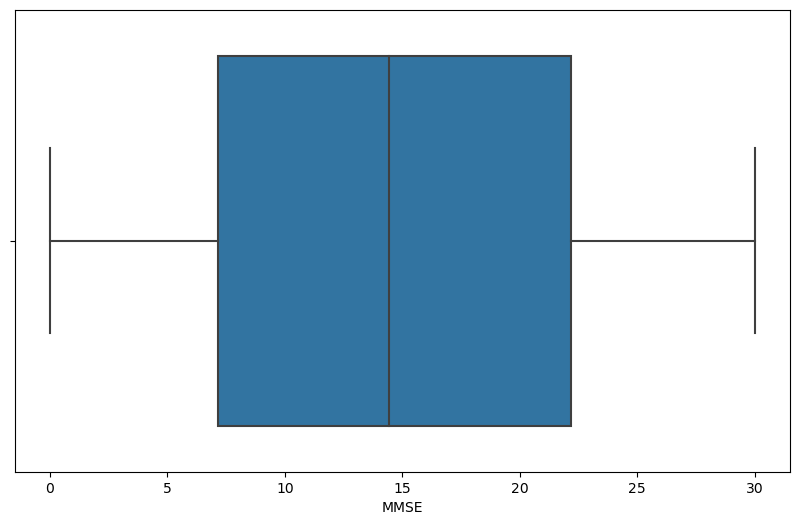

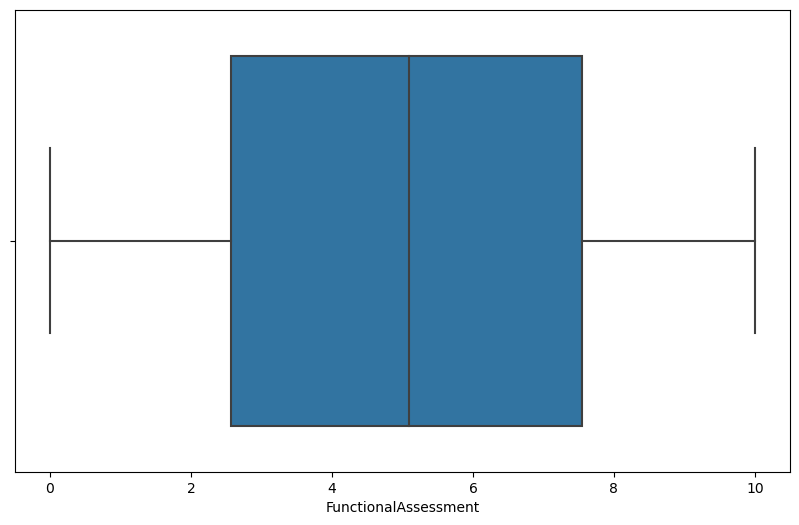

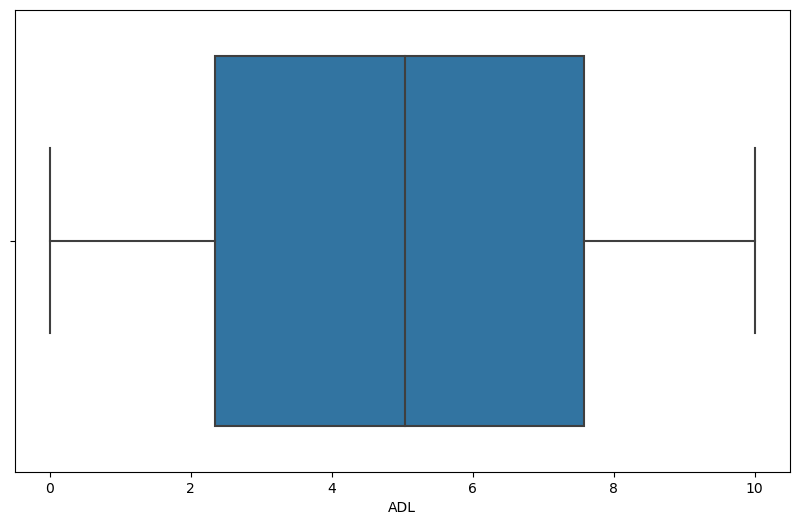

In [9]:
for col in ['Age', 'BMI', 'PhysicalActivity', 'SleepQuality', 'CholesterolTotal', 'MMSE','FunctionalAssessment', 'ADL']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, data=data)
    plt.xlabel(col)
    plt.show()

<Axes: >

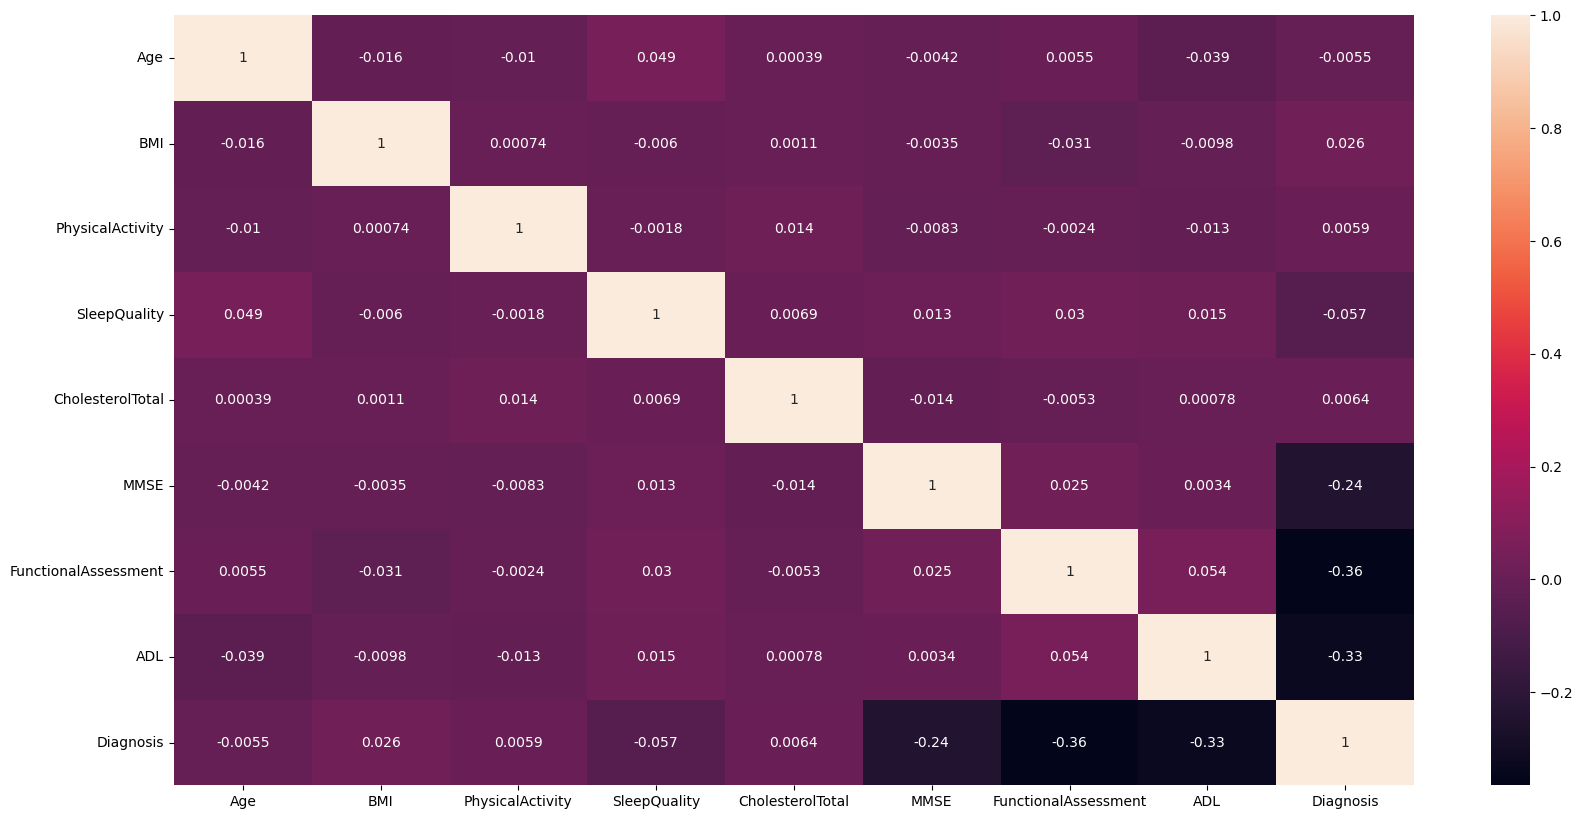

In [8]:
#plotting heatmap for overall data set
corr= data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr,annot=True)

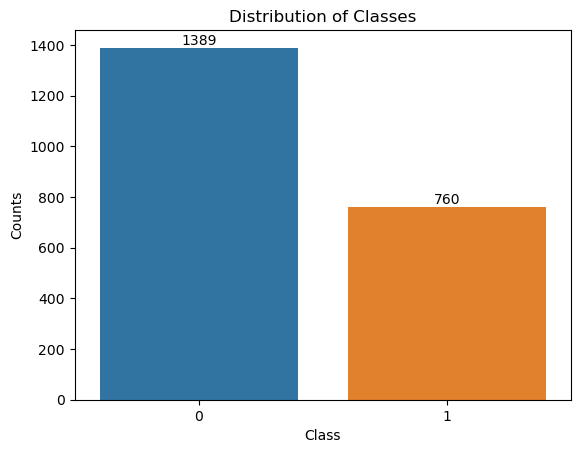

In [9]:
ax=sns.countplot(data,x="Diagnosis")
ax.bar_label(ax.containers[0])
plt.title("Distribution of Classes")
plt.xlabel("Class")
plt.ylabel("Counts")
plt.show()

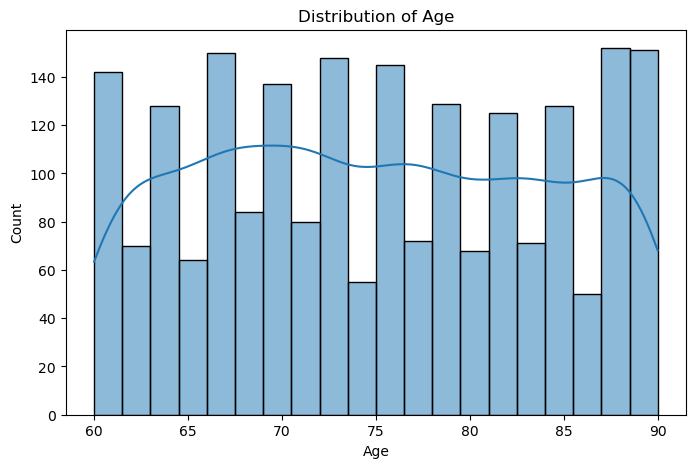

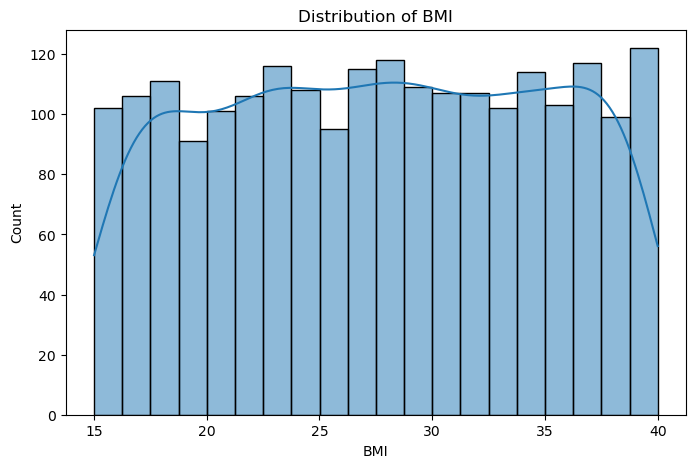

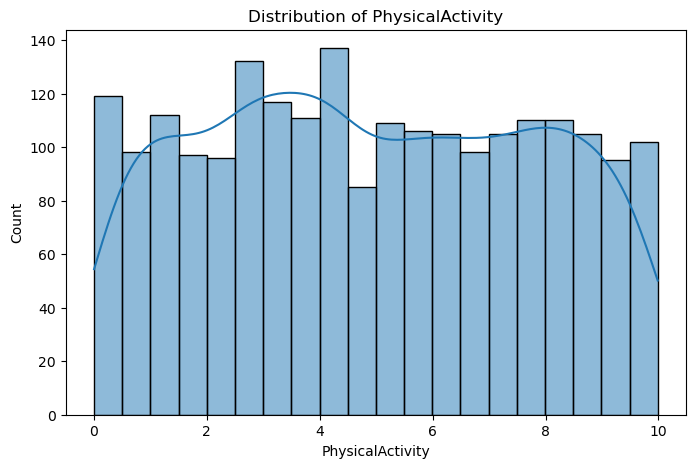

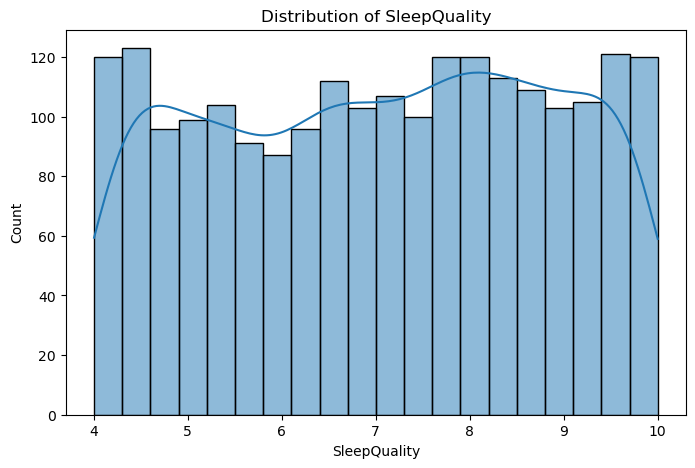

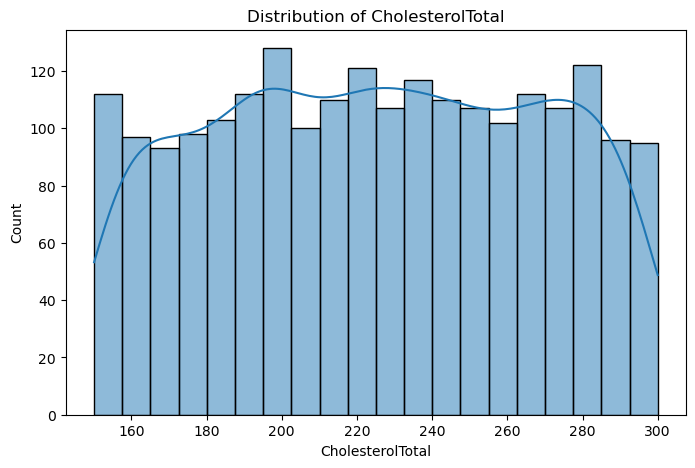

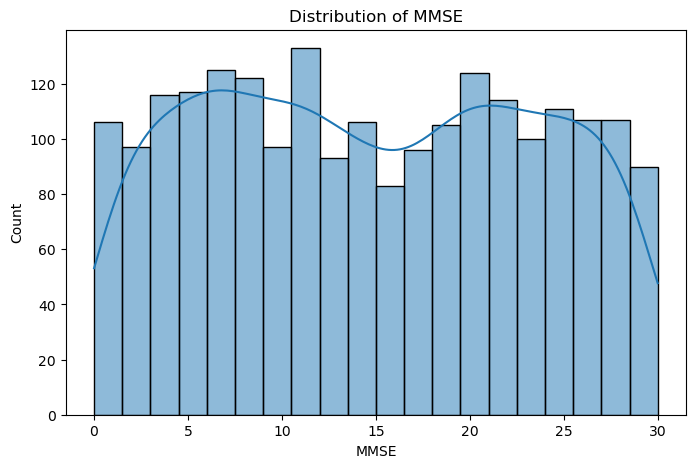

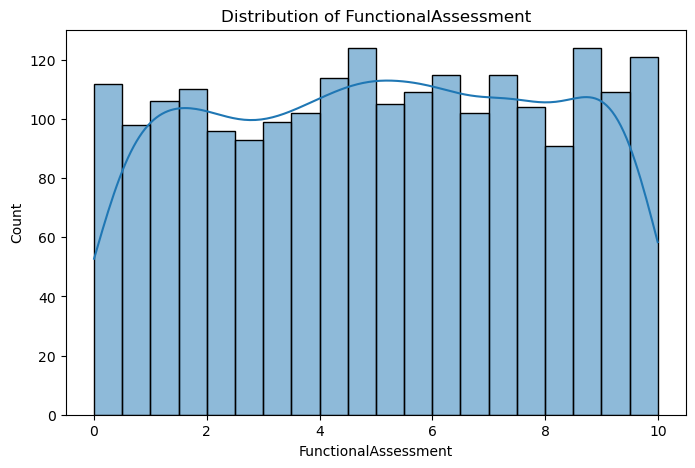

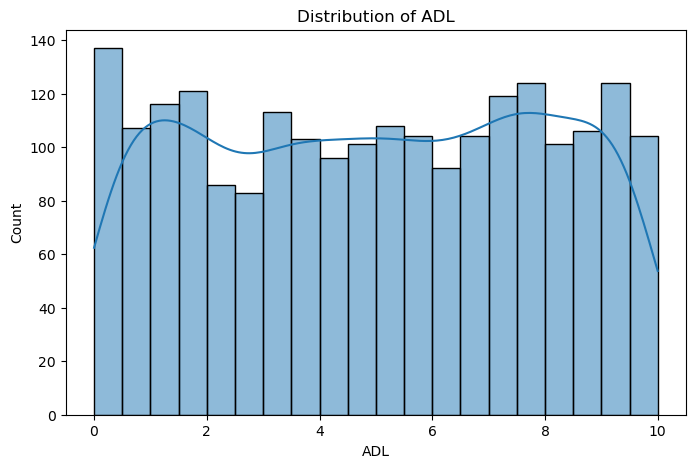

In [10]:
# Plot histogram for each numerical column
numerical_columns = ['Age', 'BMI', 'PhysicalActivity', 'SleepQuality', 'CholesterolTotal', 'MMSE','FunctionalAssessment', 'ADL']
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()

## Splitting Data

In [5]:
# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

# Pisahkan data menjadi data latih dan uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Logistic Regression**

### Model Logistic Regression

In [13]:
# Model regresi logistik
model = sm.Logit(y, X)
result = model.fit()

# Hasil
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.493583
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                 2149
Model:                          Logit   Df Residuals:                     2141
Method:                           MLE   Df Model:                            7
Date:                Wed, 18 Dec 2024   Pseudo R-squ.:                  0.2403
Time:                        20:37:22   Log-Likelihood:                -1060.7
converged:                       True   LL-Null:                       -1396.2
Covariance Type:            nonrobust   LLR p-value:                1.293e-140
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Age                      0.0223      0.004      5.183      0.000       0.014       0.031

In [12]:
# Buat model Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### Evaluasi Logistic Regression

Accuracy Score: 0.7627906976744186
Precision Score:0.704
Recall Score: 0.5751633986928104
F1 Score: 0.6330935251798561
Logistic Regression AUC: 0.7999103371793964
----------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.82       277
           1       0.70      0.58      0.63       153

    accuracy                           0.76       430
   macro avg       0.75      0.72      0.73       430
weighted avg       0.76      0.76      0.76       430

----------------------------------------------------------------------------
Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)


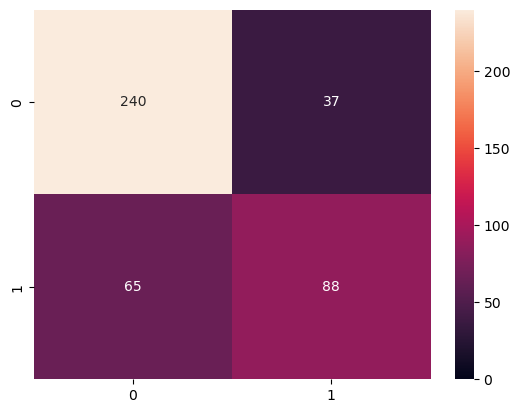

In [13]:
# Evaluasi Logistic Regression
y_pred_logreg = logreg.predict(X_test)
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]
print(f"Accuracy Score: {accuracy_score(y_test,y_pred_logreg)}")
print(f"Precision Score:{precision_score(y_test,y_pred_logreg)}")
print(f"Recall Score: {recall_score(y_test,y_pred_logreg)}")
print(f"F1 Score: {f1_score(y_test,y_pred_logreg)}")
print("Logistic Regression AUC:", roc_auc_score(y_test, y_prob_logreg))
print("----------------------------------------------------------------------------")
lr=confusion_matrix(y_test,y_pred_logreg)
print("Classification Report:")
print(classification_report(y_test,y_pred_logreg))
print("----------------------------------------------------------------------------")
print("Confusion Matrix:")
print(sns.heatmap(lr,vmin=0,annot=True,fmt=".3g"))

### Hyperparameter Logistic Regression

In [9]:
# Hyperparameter (Logistic Regression)
logreg_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [1000, 2000]
}

# Grid Search
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), logreg_param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Hasil terbaik
print("Best Parameters:", grid_search.best_params_)
best_model_logreg = grid_search.best_estimator_

# Evaluasi ulang dengan model terbaik
y_pred = best_model_logreg.predict(X_test)
print("Accuracy (Best Model Logistic Regression):", accuracy_score(y_test, y_pred))
print("Classification Report (Best Model Logistic Regression):\n", classification_report(y_test, y_pred))

Best Parameters: {'C': 0.01, 'max_iter': 1000, 'solver': 'lbfgs'}
Accuracy (Best Model Logistic Regression): 0.7674418604651163
Classification Report (Best Model Logistic Regression):
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       277
           1       0.72      0.58      0.64       153

    accuracy                           0.77       430
   macro avg       0.75      0.72      0.73       430
weighted avg       0.76      0.77      0.76       430



## **Random Forest**

### Model Random Forest

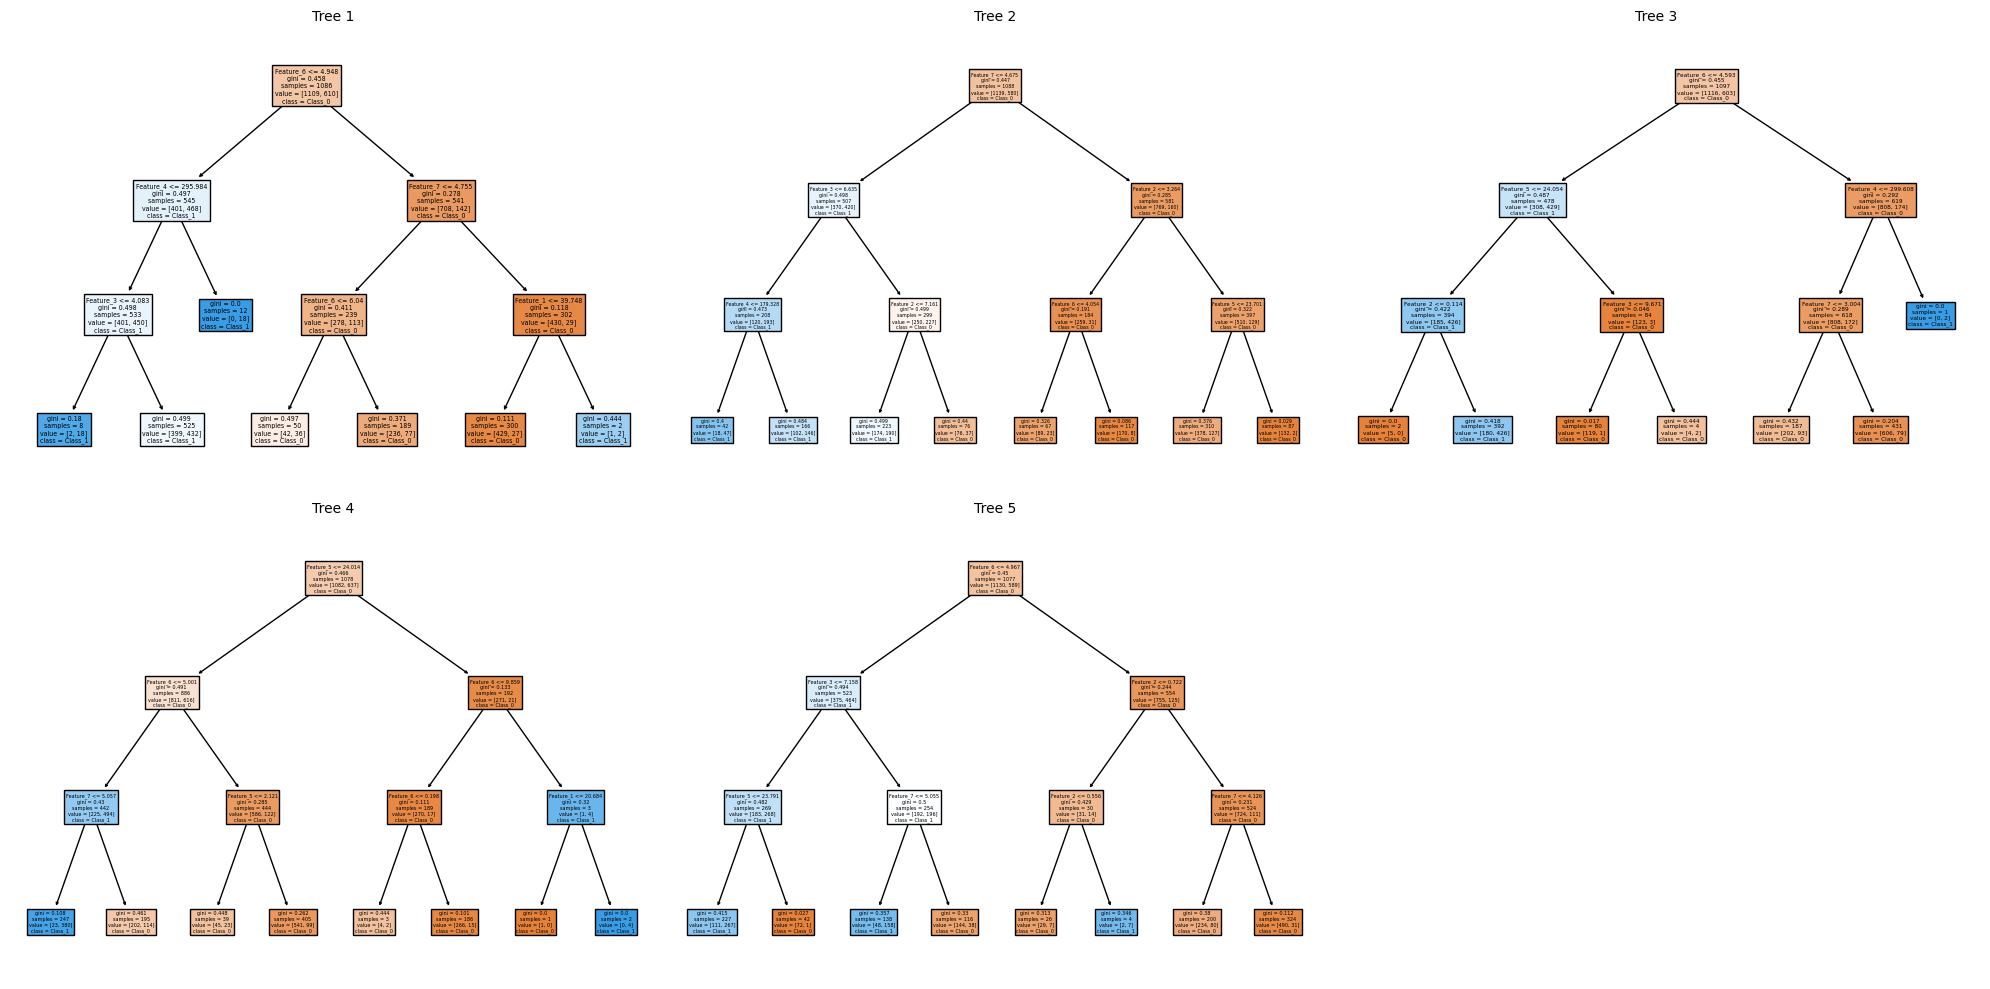

In [12]:
# Visualisasi dalam grid layout (2x3 untuk 6 pohon)
n_trees = len(rf_model.estimators_)  # Ambil jumlah pohon
n_rows = 2  # Jumlah baris dalam grid
n_cols = 3  # Jumlah kolom dalam grid

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))  # Ukuran grid
axes = axes.flatten()  # Ratakan array axes untuk iterasi

for i, tree in enumerate(rf_model.estimators_):
    plot_tree(
        tree,
        feature_names=[f'Feature_{j}' for j in range(X.shape[1])],  # Nama fitur
        class_names=['Class_0', 'Class_1'],  # Nama kelas
        filled=True,
        ax=axes[i]  # Subplot untuk masing-masing pohon
    )
    axes[i].set_title(f'Tree {i+1}', fontsize=10)  # Judul tiap pohon

# Hapus subplot kosong (jika jumlah pohon < jumlah grid)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [8]:
# Buat model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluasi Random Forest

Accuracy Score: 0.8186046511627907
Precision Score:0.8504672897196262
Recall Score: 0.5947712418300654
F1 Score: 0.6999999999999998
Logistic Regression AUC: 0.8413793917085485
----------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       277
           1       0.85      0.59      0.70       153

    accuracy                           0.82       430
   macro avg       0.83      0.77      0.78       430
weighted avg       0.82      0.82      0.81       430

----------------------------------------------------------------------------
Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)


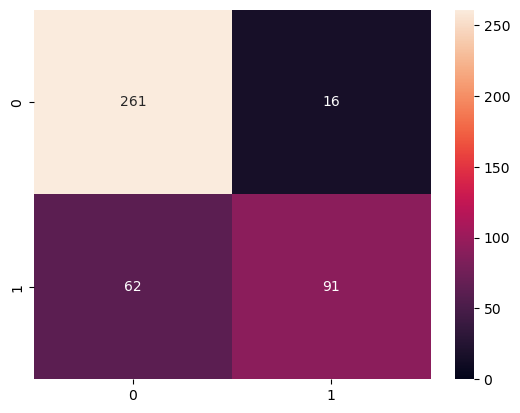

In [9]:
# Evaluasi Random Forest
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
print(f"Accuracy Score: {accuracy_score(y_test,y_pred_rf)}")
print(f"Precision Score:{precision_score(y_test,y_pred_rf)}")
print(f"Recall Score: {recall_score(y_test,y_pred_rf)}")
print(f"F1 Score: {f1_score(y_test,y_pred_rf)}")
print("Logistic Regression AUC:", roc_auc_score(y_test, y_prob_rf))
print("----------------------------------------------------------------------------")
lr=confusion_matrix(y_test,y_pred_rf)
print("Classification Report:")
print(classification_report(y_test,y_pred_rf))
print("----------------------------------------------------------------------------")
print("Confusion Matrix:")
print(sns.heatmap(lr,vmin=0,annot=True,fmt=".3g"))

### Hyperparameter Random Forest

In [10]:
# Hyperparameter (Random Forest)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Hasil terbaik
print("Best Parameters:", grid_search.best_params_)
best_model_rf = grid_search.best_estimator_

# Evaluasi ulang dengan model terbaik
y_pred = best_model_rf.predict(X_test)
print("Accuracy (Best Model Random Forest):", accuracy_score(y_test, y_pred))
print("Classification Report (Best Model Random Forest):\n", classification_report(y_test, y_pred))

Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy (Best Model Random Forest): 0.8232558139534883
Classification Report (Best Model Random Forest):
               precision    recall  f1-score   support

           0       0.79      0.98      0.88       277
           1       0.94      0.54      0.68       153

    accuracy                           0.82       430
   macro avg       0.87      0.76      0.78       430
weighted avg       0.85      0.82      0.81       430



## **Decision Tree**

### Model Decision Tree

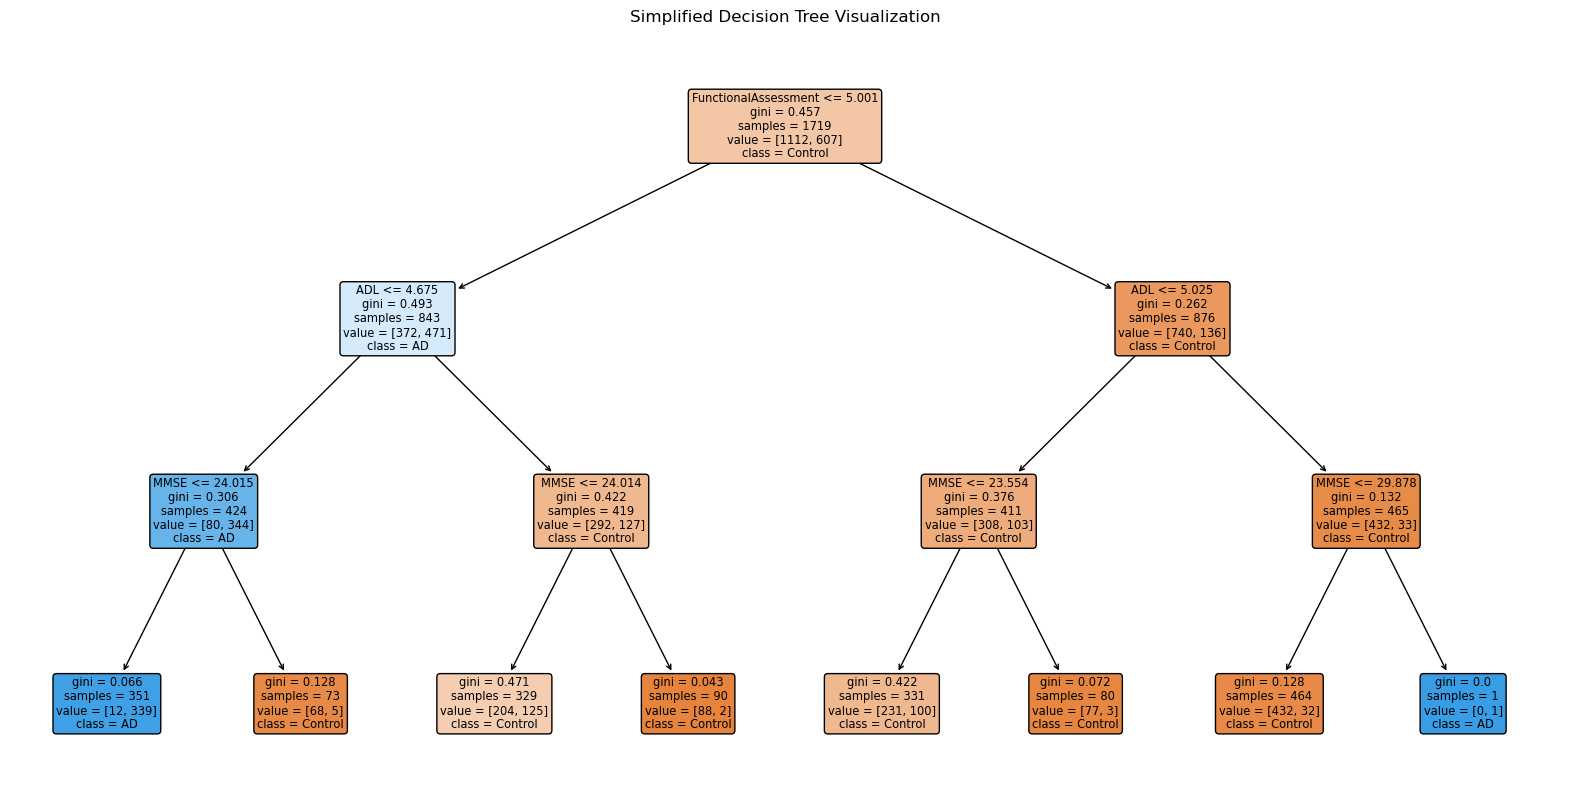

In [18]:
simpler_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
simpler_dt.fit(X_train, y_train)

# Visualisasi Decision Tree dengan kedalaman yang dibatasi
plt.figure(figsize=(20, 10))
plot_tree(
    simpler_dt, 
    feature_names=X.columns.tolist(),  # Nama fitur
    class_names=['Control', 'AD'],     # Nama kelas
    filled=True, 
    rounded=True
)
plt.title("Simplified Decision Tree Visualization")
plt.show()

In [7]:
# Buat model Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Evaluasi Decision Tree

Accuracy Score: 0.7534883720930232
Precision Score:0.6598639455782312
Recall Score: 0.6339869281045751
F1 Score: 0.6466666666666666
Decision Tree AUC: 0.7267407564710602
----------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       277
           1       0.66      0.63      0.65       153

    accuracy                           0.75       430
   macro avg       0.73      0.73      0.73       430
weighted avg       0.75      0.75      0.75       430

----------------------------------------------------------------------------
Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)


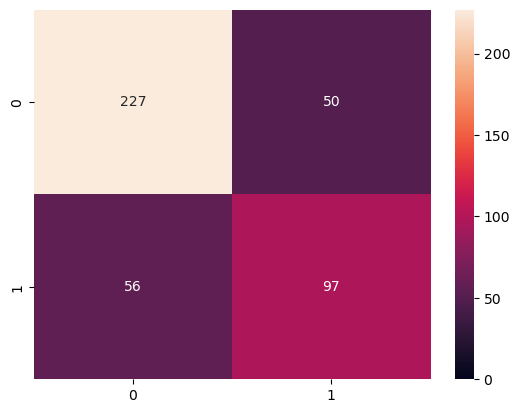

In [8]:
# Evaluasi Decision Tree
y_pred_dtree = dtree.predict(X_test)
y_prob_dtree = dtree.predict_proba(X_test)[:, 1]
print(f"Accuracy Score: {accuracy_score(y_test,y_pred_dtree)}")
print(f"Precision Score:{precision_score(y_test,y_pred_dtree)}")
print(f"Recall Score: {recall_score(y_test,y_pred_dtree)}")
print(f"F1 Score: {f1_score(y_test,y_pred_dtree)}")
print("Decision Tree AUC:", roc_auc_score(y_test, y_prob_dtree))
print("----------------------------------------------------------------------------")
lr=confusion_matrix(y_test,y_pred_dtree)
print("Classification Report:")
print(classification_report(y_test,y_pred_dtree))
print("----------------------------------------------------------------------------")
print("Confusion Matrix:")
print(sns.heatmap(lr,vmin=0,annot=True,fmt=".3g"))

### Hyperparameter Decision Tree

In [9]:
# Hyperparameter Decision Tree
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Hasil terbaik
print("Best Parameters:", grid_search.best_params_)
best_model_dt = grid_search.best_estimator_

# Evaluasi ulang dengan model terbaik
y_pred = best_model_dt.predict(X_test)
print("Accuracy (Best Model decision tree):", accuracy_score(y_test, y_pred))
print("Classification Report (Best Model):\n", classification_report(y_test, y_pred))

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy (Best Model decision tree): 0.7744186046511627
Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       277
           1       0.73      0.59      0.65       153

    accuracy                           0.77       430
   macro avg       0.76      0.73      0.74       430
weighted avg       0.77      0.77      0.77       430



## Evaluasi dan Best Model

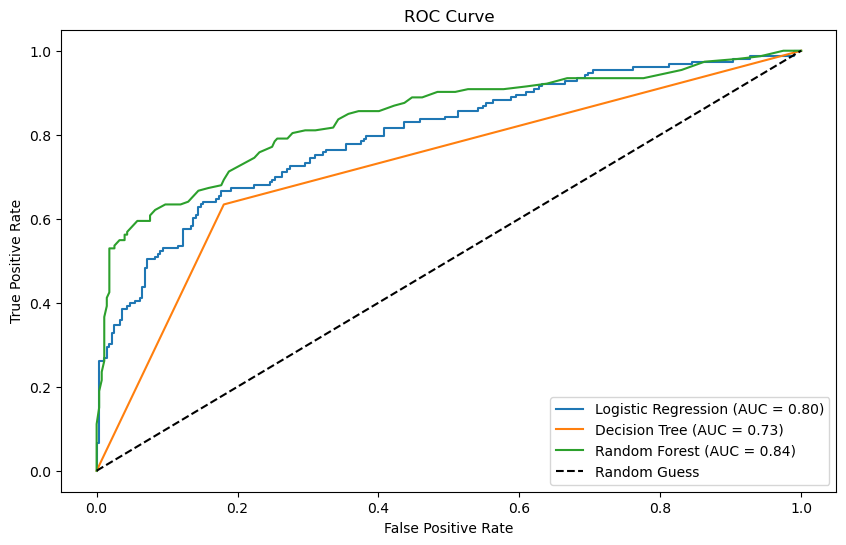

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Hitung ROC Curve
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
fpr_dtree, tpr_dtree, _ = roc_curve(y_test, y_prob_dtree)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_logreg):.2f})")
plt.plot(fpr_dtree, tpr_dtree, label=f"Decision Tree (AUC = {roc_auc_score(y_test, y_prob_dtree):.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()